# Inference 

In [11]:
# !pip install fastapi
# !pip install ultralytics
# !pip install -U bitsandbytes
# !pip install python-multipart
# !pip install pyngrok
# !pip install uvicorn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 2.9 MB/s eta 0:00:00


In [20]:
id2class={0: 'Corn_Cercospora_Leaf_Spot', 1: 'Corn_Common_Rust', 2: 'Corn_Healthy', 3: 'Corn_Northern_Leaf_Blight', 4: 'Corn_Streak', 5: 'Pepper_Bacterial_Spot', 6: 'Pepper_Cercospora', 7: 'Pepper_Early_Blight', 8: 'Pepper_Fusarium', 9: 'Pepper_Healthy', 10: 'Pepper_Late_Blight', 11: 'Pepper_Leaf_Blight', 12: 'Pepper_Leaf_Curl', 13: 'Pepper_Leaf_Mosaic', 14: 'Pepper_Septoria', 15: 'Tomato_Bacterial_Spot', 16: 'Tomato_Early_Blight', 17: 'Tomato_Fusarium', 18: 'Tomato_Healthy', 19: 'Tomato_Late_Blight', 20: 'Tomato_Leaf_Curl', 21: 'Tomato_Mosaic', 22: 'Tomato_Septoria'}


In [29]:
from transformers import AutoModelForCausalLM, AutoTokenizer, BitsAndBytesConfig
import torch
import cv2
import glob
import random
import matplotlib.pyplot as plt
import os

# Compute dtype (use float16 for better memory efficiency)
compute_dtype = getattr(torch, "float16")

# Model path for the base model
model_id = "/kaggle/input/llama-3/transformers/8b-chat-hf/1"

# Configure the 4-bit quantization with bitsandbytes
quant_config = BitsAndBytesConfig(
    load_in_4bit=True,  # Load in 4-bit
    bnb_4bit_quant_type="nf4",  # NF4 quantization type
    bnb_4bit_compute_dtype=compute_dtype,  # Use float16 for computation
    bnb_4bit_use_double_quant=True,  # Double quantization for better efficiency
)

# Load the tokenizer from the model directory
tokenizer = AutoTokenizer.from_pretrained(model_id)

# Load the base model with quantization config and device mapping
model = AutoModelForCausalLM.from_pretrained(
    model_id,
    quantization_config=quant_config,
    device_map={"": 0}  # Place the model on GPU if available (or adjust as needed)
)

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

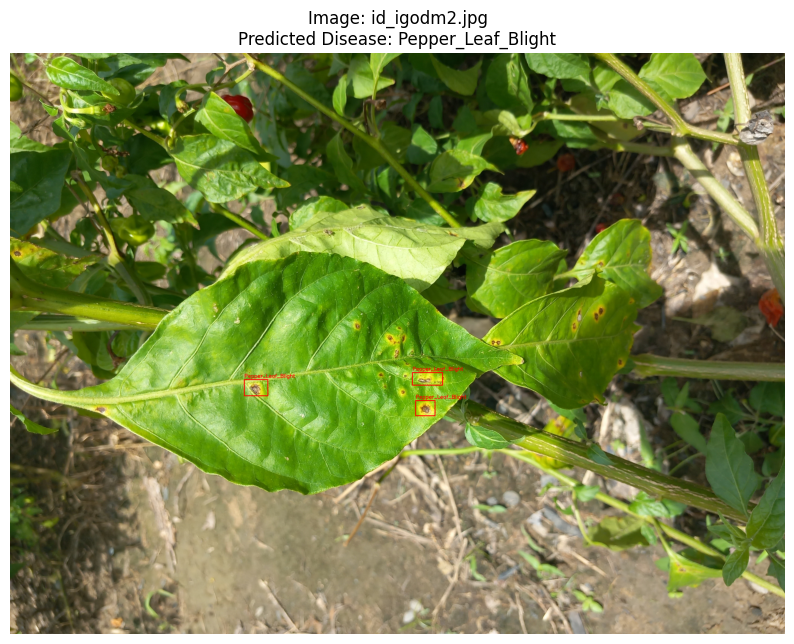

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


LLaMA 3 Response for Pepper_Leaf_Blight:
You are an expert in hydroponics and plant pathology. A YOLO model has detected Pepper_Leaf_Blight in a hydroponic system. Provide a precise, actionable response on preventing and treating this disease.

        Include:
        - **Prevention**: Environmental controls (temperature, humidity, pH, EC, light), air circulation, system hygiene, and resistant plant varieties.
        - **Treatment**: Immediate containment, environmental adjustments, and recommended chemical/biological treatments.

        Base your response on the latest best practices in hydroponic disease management. Provide a concise, easy-to-understand summary for a non-expert audience.

**Prevention:**

1. **Environmental controls**:
	* Maintain optimal temperature (18-22°C) and humidity (50-60%) levels.
	* Monitor pH (5.5-6.5) and EC (1.5-2.5) levels, adjusting as necessary.
	* Ensure adequate light (12-14 hours/day) and adjust intensity according to plant requirements.
2. **Ai

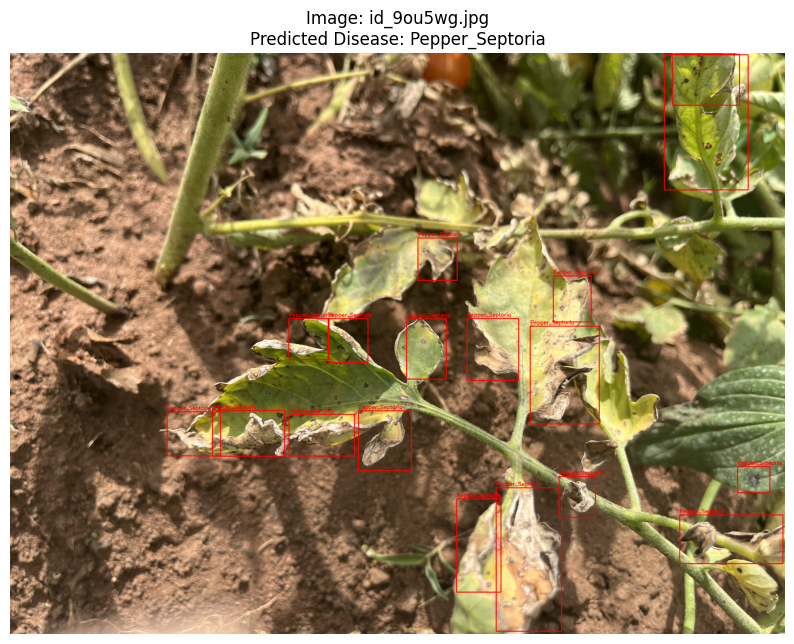

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


LLaMA 3 Response for Pepper_Septoria:
You are an expert in hydroponics and plant pathology. A YOLO model has detected Pepper_Septoria in a hydroponic system. Provide a precise, actionable response on preventing and treating this disease.

        Include:
        - **Prevention**: Environmental controls (temperature, humidity, pH, EC, light), air circulation, system hygiene, and resistant plant varieties.
        - **Treatment**: Immediate containment, environmental adjustments, and recommended chemical/biological treatments.

        Base your response on the latest best practices in hydroponic disease management. Provide a concise, easy-to-understand summary for a non-expert audience.

**Prevention:**

1. **Temperature control**: Maintain a temperature range of 18-22°C (64-72°F) to prevent Pepper_Septoria growth.
2. **Humidity control**: Keep relative humidity below 60% to reduce fungal spore germination.
3. **pH and EC management**: Monitor and adjust pH (5.5-6.5) and EC (1.5-2.5) t

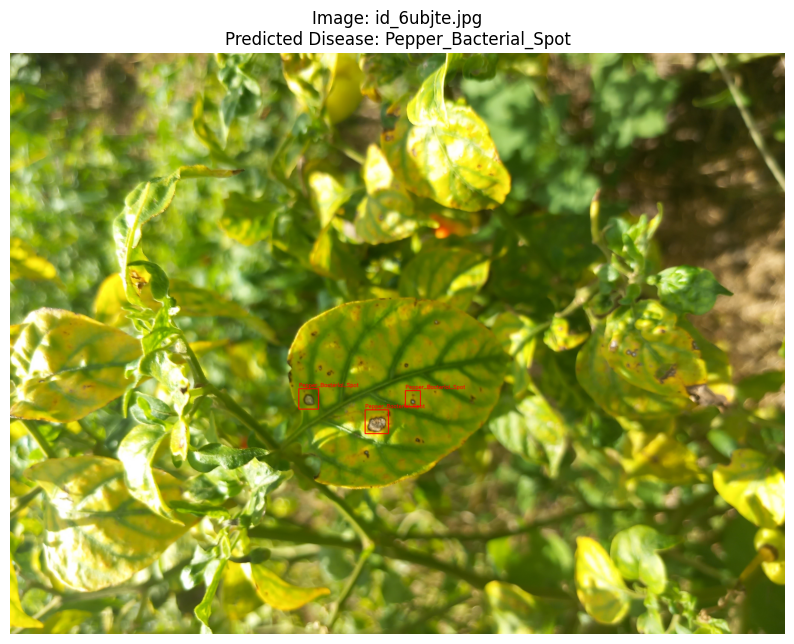

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


LLaMA 3 Response for Pepper_Bacterial_Spot:
You are an expert in hydroponics and plant pathology. A YOLO model has detected Pepper_Bacterial_Spot in a hydroponic system. Provide a precise, actionable response on preventing and treating this disease.

        Include:
        - **Prevention**: Environmental controls (temperature, humidity, pH, EC, light), air circulation, system hygiene, and resistant plant varieties.
        - **Treatment**: Immediate containment, environmental adjustments, and recommended chemical/biological treatments.

        Base your response on the latest best practices in hydroponic disease management. Please provide a concise, easy-to-understand response.

        **Please note that this is a simulated scenario, and actual disease management may require consultation with a qualified expert or local authorities.**

        **Prevention:**

        To prevent Pepper_Bacterial_Spot in your hydroponic system, focus on the following:

        1. **Temperature contr

In [33]:
# Load YOLO model for disease prediction
yolo_model = YOLO('runs/detect/train_0/weights/best.pt', task='detect')

# Directory containing the images
image_dir = '/kaggle/input/ghana-crop-disease/images'
image_paths = glob.glob(f'{image_dir}/*.jpg')

# Select 5 random images
random_images = random.sample(image_paths, 5)

for image_path in random_images:
    img = cv2.imread(image_path)
    
    # Use YOLO model to detect diseases
    results = yolo_model(img, imgsz=640, verbose=False, conf=0.25, augment=False, iou=0.4, max_det=500)[0]
    
    # Extract predicted class for the detected disease (assuming at least one detection)
    detected_class = None
    for cls in results.boxes.cls.cpu().numpy():
        detected_class = id2class[int(cls)]
        break  # Only take the first detected class

    if detected_class:
        # Show the image with bounding boxes and predicted disease
        for box, cls in zip(results.boxes.xyxy.cpu().numpy(), results.boxes.cls.cpu().numpy()):
            x1, y1, x2, y2 = box
            cv2.rectangle(img, (int(x1), int(y1)), (int(x2), int(y2)), (0, 0, 255), thickness=3)
            cv2.putText(img, detected_class, (int(x1), int(y1) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 0, 255), 2)
        
        plt.figure(figsize=(10, 10))
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title(f'Image: {os.path.basename(image_path)}\nPredicted Disease: {detected_class}')
        plt.axis('off')
        plt.show()

        # Generate LLaMA 3 prompt
        prompt = f"""You are an expert in hydroponics and plant pathology. A YOLO model has detected {detected_class} in a hydroponic system. Provide a precise, actionable response on preventing and treating this disease.

        Include:
        - **Prevention**: Environmental controls (temperature, humidity, pH, EC, light), air circulation, system hygiene, and resistant plant varieties.
        - **Treatment**: Immediate containment, environmental adjustments, and recommended chemical/biological treatments.

        Base your response on the latest best practices in hydroponic disease management."""

        # Process input
        inputs = tokenizer(prompt, return_tensors="pt").to(model.device)

        # Generate output
        output = model.generate(**inputs, max_new_tokens=500)

        # Decode and print response
        response = tokenizer.decode(output[0], skip_special_tokens=True)
        print(f"LLaMA 3 Response for {detected_class}:")
        print(response)
    else:
        print(f"No disease detected in {os.path.basename(image_path)}.")


# Fast API

In [ ]:
from fastapi import FastAPI, File, UploadFile
from fastapi.responses import JSONResponse
from fastapi.middleware.cors import CORSMiddleware
import torch
import cv2
import numpy as np
import random
from transformers import AutoModelForCausalLM, AutoTokenizer, BitsAndBytesConfig
from ultralytics import YOLO
import io

# Initialize FastAPI app
app = FastAPI()
app.add_middleware(
    CORSMiddleware,
    allow_origins=["*"],
    allow_credentials=True,
    allow_methods=["*"],
    allow_headers=["*"],
)

# Load LLaMA 3 model
compute_dtype = getattr(torch, "float16")
model_id = "/kaggle/input/llama-3/transformers/8b-chat-hf/1"
quant_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_compute_dtype=compute_dtype,
    bnb_4bit_use_double_quant=True,
)
tokenizer = AutoTokenizer.from_pretrained(model_id)
model = AutoModelForCausalLM.from_pretrained(
    model_id, quantization_config=quant_config, device_map={"": 0}
)

# Load YOLO model
yolo_model = YOLO('runs/detect/train_0/weights/best.pt', task='detect')

@app.post("/predict")
async def predict(file: UploadFile = File(...)):
    contents = await file.read()
    np_arr = np.frombuffer(contents, np.uint8)
    img = cv2.imdecode(np_arr, cv2.IMREAD_COLOR)
    
    # Perform YOLO prediction
    results = yolo_model(img, imgsz=640, verbose=False, conf=0.25, augment=False, iou=0.4, max_det=500)[0]
    
    detected_diseases = []
    for cls in results.boxes.cls.cpu().numpy():
        detected_diseases.append(id2class.get(int(cls), "Unknown Disease"))
    
    if not detected_diseases:
        return JSONResponse(content={"message": "No disease detected."})
    
    detected_class = detected_diseases[0]  # Assuming single detection for now
    
    # Generate response from LLaMA 3
    prompt = f"You are an expert in hydroponics. The detected disease is {detected_class}. Explain how to prevent and treat this disease in a hydroponic system."
    inputs = tokenizer(prompt, return_tensors="pt").to(model.device)
    output = model.generate(**inputs, max_new_tokens=150)
    response_text = tokenizer.decode(output[0], skip_special_tokens=True)
    
    return JSONResponse(content={"detected_disease": detected_class, "llama_response": response_text})


In [14]:
import os
os.environ['ngrok_authToken']='2pqNMvvvTDN1B4RL6beU7Ccbwu1_6RYQsJQhg7S1oARTDefwo'


In [15]:
import nest_asyncio
from pyngrok import ngrok,conf
import uvicorn

# Allow nested event loops
nest_asyncio.apply()
auth_token = os.getenv("ngrok_authToken")

if not auth_token:
    raise ValueError("ngrok_authToken environment variable not set!")

# Configure ngrok with the auth_token
conf.get_default().auth_token = auth_token

# Expose the API to the internet
public_url = ngrok.connect(8000)
print(f"Public URL: {public_url}")

# Start the FastAPI server
uvicorn.run(app, host="0.0.0.0", port=8000)


Public URL: NgrokTunnel: "https://a9c7-34-168-39-254.ngrok-free.app" -> "http://localhost:8000"     


INFO:     Started server process [107]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://0.0.0.0:8000 (Press CTRL+C to quit)
INFO:     Shutting down
INFO:     Waiting for application shutdown.
INFO:     Application shutdown complete.
INFO:     Finished server process [107]
